In [1]:
total = 440000
pago_de_golpe = 300000
pago_de_golpe_taxable = 300000*(1-0.3)
pago_laminado = total - pago_de_golpe
pago_laminado
meses_laminado = 4*13
# 
salario_2024 = 40000

In [2]:
import math
import matplotlib.pyplot as plt

In [3]:
def calculate_taxes(salary):
    total_tax = 0

    # Apply the 19% rate to the first 12,450 Euros
    if salary > 0:
        taxable_amount = min(12450, salary)
        total_tax += taxable_amount * 0.19

    # Apply the 24% rate to the amount between 12,450 and 20,199 Euros
    if salary > 12450:
        taxable_amount = min(20199, salary) - 12450
        total_tax += taxable_amount * 0.24

    # Apply the 30% rate to the amount between 20,200 and 35,199 Euros
    if salary > 20199:
        taxable_amount = min(35199, salary) - 20200
        total_tax += taxable_amount * 0.30

    # Apply the 37% rate to the amount between 35,200 and 59,999 Euros
    if salary > 35199:
        taxable_amount = min(59999, salary) - 35200
        total_tax += taxable_amount * 0.37

    # Apply the 45% rate to the amount between 60,000 and 299,999 Euros
    if salary > 59999:
        taxable_amount = min(299999, salary) - 60000
        total_tax += taxable_amount * 0.45

    # Apply the 47% rate to the amount above 300,000 Euros
    if salary > 299999:
        taxable_amount = salary - 300000
        total_tax += taxable_amount * 0.47

    return total_tax

In [ ]:
# mes_fecha_inicio_desvinculacion = 
# salario_recibido_año_hasta_fecha_desvinculación = 

In [ ]:
# def calculo_IRPF_primer_año()
# def calculo_IRPF_años_desviculacion()
# def calculo_IRPF_ultimo_año()

In [4]:
def calculo_IRPF_total(pago_de_golpe_taxable, pago_laminado, salario_2024, pension_ultimo_año, meses_laminado):
    # IRPF_2024
    total_2024 = salario_2024 + 6*(pago_laminado/meses_laminado) + pago_de_golpe_taxable
    impuestos_2024 = calculate_taxes(total_2024)
    # 
    años_laminado = math.ceil(meses_laminado -6)/12 
    años_igual_contribucion = años_laminado - 1
    # IRPF años de igual contribucion
    total_anual_años_desvinculacion = 12*(pago_laminado/meses_laminado)
    impuestos_años_desvinculacion = calculate_taxes(total_anual_años_desvinculacion)
    total_impuestos_años_desvinculacion = impuestos_años_desvinculacion*años_igual_contribucion
    # IRPF ultimo año
    total_meses_laminado_ultimo_año = meses_laminado - 6 - años_igual_contribucion*12
    total_laminado_ultimo_año = total_meses_laminado_ultimo_año*(pago_laminado/meses_laminado)
    total_ultimo_año = pension_ultimo_año + total_laminado_ultimo_año
    impuestos_ultimo_año = calculate_taxes(total_ultimo_año)
    # 
    impuestos_totales = impuestos_2024 + total_impuestos_años_desvinculacion + impuestos_ultimo_año
    return impuestos_totales, impuestos_2024, impuestos_años_desvinculacion, impuestos_ultimo_año

In [5]:
total = 440000
pago_de_golpe = 300000
pago_de_golpe_taxable = 300000*(1-0.3)
pago_laminado = total - pago_de_golpe
pago_laminado
meses_laminado = 4*13
# 
salario_2024 = 40000
pension_ultimo_año = 30000
# 
calculo_IRPF_total(pago_de_golpe_taxable, pago_laminado, salario_2024, pension_ultimo_año, meses_laminado)

(151871.98076923075, 110669.82076923076, 7857.567692307693, 18939.051538461536)

In [6]:
meses_laminado_lista = list(range(1*12, 10*12))

In [7]:
IRPF_lista = []
impuestos_2024_lista = []
impuestos_años_desvinculacion_lista = []
impuestos_ultimo_año_lista = []
for meses_laminado in meses_laminado_lista:
    IRPF, impuestos_2024, impuestos_años_desvinculacion, impuestos_ultimo_año = calculo_IRPF_total(pago_de_golpe_taxable, pago_laminado, salario_2024, pension_ultimo_año, meses_laminado)
    IRPF_lista.append(IRPF)
    impuestos_2024_lista.append(impuestos_2024)
    impuestos_años_desvinculacion_lista.append(impuestos_años_desvinculacion)
    impuestos_ultimo_año_lista.append(impuestos_ultimo_año)


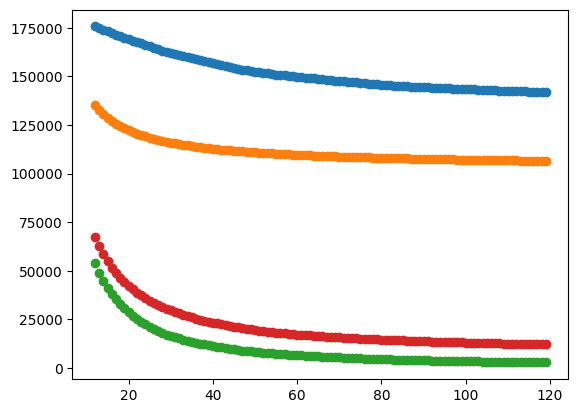

In [8]:
plt.scatter(meses_laminado_lista, IRPF_lista)
plt.scatter(meses_laminado_lista, impuestos_2024_lista)
plt.scatter(meses_laminado_lista, impuestos_años_desvinculacion_lista)
plt.scatter(meses_laminado_lista, impuestos_ultimo_año_lista)